In [1]:
# Importing the libraries
from PIL import Image
import numpy as np
import os 
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [4]:
image1 = cv2.imread('Test/tobacco/tobacco_4261.JPG')
image = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

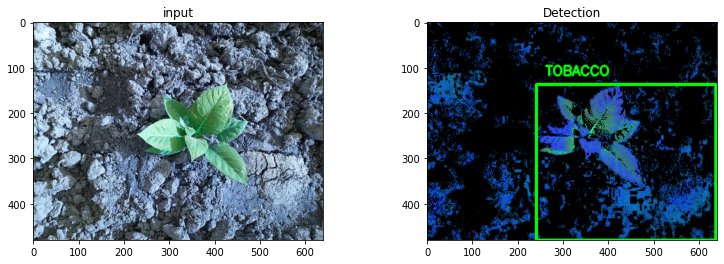

In [5]:
lower = [np.mean(image[:,:,i] - np.std(image[:,:,i])/3 ) for i in range(3)]
upper = [250, 250, 250]
lower = np.array(lower, dtype="uint8")
upper = np.array(upper, dtype="uint8")
mask = cv2.inRange(image, lower, upper)
output = cv2.bitwise_and(image, image, mask=mask)
ret,thresh = cv2.threshold(mask, 40, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


# find the biggest countour (c) by the area
c = max(contours, key = cv2.contourArea)
x,y,w,h = cv2.boundingRect(c)

# draw the biggest contour (c) in green
cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),5)
cv2.putText(output, "TOBACCO", (x+20, y-20),cv2.FONT_HERSHEY_SIMPLEX,1, (0, 255, 0), 3) 
plt.figure(figsize=(20,4))
plt.subplot(1,3,1),plt.imshow(image1),plt.title("input")
plt.subplot(1,3,2),plt.imshow(output),plt.title("Detection")

plt.show()

In [ ]:
dir_path ='Test/tobacco'
for i in os.listdir(dir_path):
    image1 = cv2.imread(dir_path+'//'+ i)
    image = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    lower = [np.mean(image[:,:,i] - np.std(image[:,:,i])/3 ) for i in range(3)]
    upper = [250, 250, 250]
    lower = np.array(lower, dtype="uint8")
    upper = np.array(upper, dtype="uint8")
    mask = cv2.inRange(image, lower, upper)
    output = cv2.bitwise_and(image, image, mask=mask)
    ret,thresh = cv2.threshold(mask, 40, 255, 0)
    contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)


    # find the biggest countour (c) by the area
    c = max(contours, key = cv2.contourArea)
    x,y,w,h = cv2.boundingRect(c)

    # draw the biggest contour (c) in green
    cv2.rectangle(output,(x,y),(x+w,y+h),(0,255,0),5)
    cv2.putText(output, "TOBACCO", (x+20, y-20),cv2.FONT_HERSHEY_SIMPLEX,1, (0, 255, 0), 3) 
    plt.figure(figsize=(20,4))
    plt.subplot(1,3,1),plt.imshow(image1),plt.title("input")
    plt.subplot(1,3,2),plt.imshow(output),plt.title("Detection")

    plt.show()